In [ ]:
#DIR3122: Computational Fluid Dynamics - Bridget McGibbon
#Step 4: Convection-Diffusion in 1D (Burgers' Equation)

In [1]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import sympy as sp
sp.init_printing(use_latex=True)

In [2]:
x, nu, t = sp.symbols('x nu t')
phi = (sp.exp(-(x-(4*t))**2/(4*nu*(t + 1))) + sp.exp(-(x - (4*t) - (2*sp.pi))**2 / (4*nu*(t + 1))))
phi

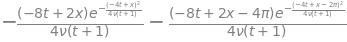

In [3]:
phiprime = phi.diff(x) #this differentiates phi with respect to x 
phiprime

In [4]:
u = -2*nu*(phiprime/phi)+4
#we'll use the sympy function 'lambdify' to turn u into a callable function
ufunc = sp.utilities.lambdify((t,x,nu), u)
print(ufunc(1,4,3))

3.49170664206445


In [5]:
#define variables
#grid will be 2pi wide
nx = 101 #number of points in grid
nt = 100 #number of timesteps
dx = 2*np.pi/(nx-1) #space between each point
nu = 0.07 #viscosity
dt = dx*nu #length of timestep

xdimension = np.linspace(0, 2*np.pi, nx)
t = 0

u = np.asarray([ufunc(t, xdimension0, nu) for xdimension0 in xdimension])
un = u.copy()

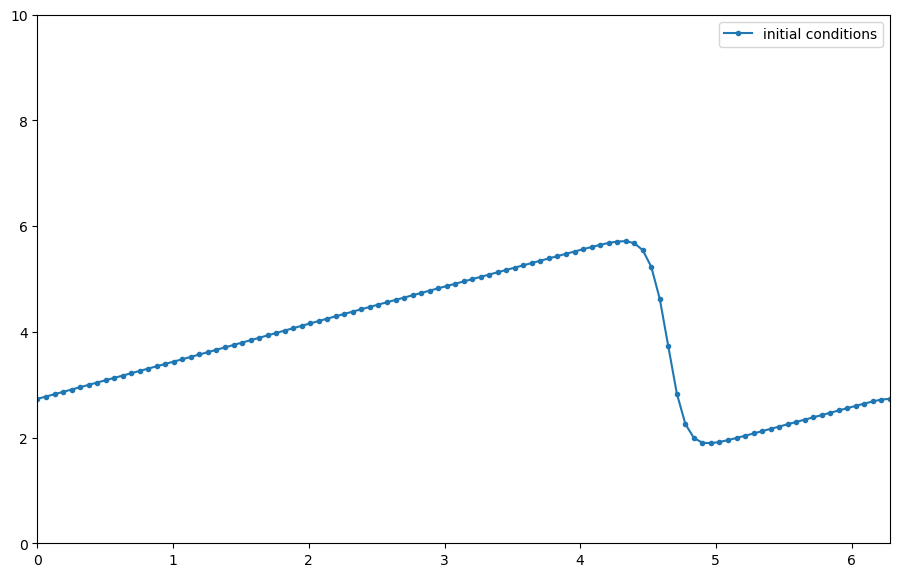

In [14]:
pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(xdimension, u, marker='.', label='initial conditions')
pyplot.xlim([0,2*np.pi])
pyplot.ylim([0,10]);
pyplot.legend()
pyplot.xlim([0,2*np.pi])
pyplot.ylim([0,10]);

In [7]:
u_analytical = np.asarray([ufunc(nt*dt, xdimensionni, nu) for xdimensionni in xdimension])

for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 *\
                (un[i+1] - 2 * un[i] + un[i-1])
    u[0] = un[i] + (un[0]*(dt/dx)*(un[0]-un[-2])) + (nu*(dt/(dx**2))*(un[1]+un[-2]-2*un[0]))
    u[-1] = u[0] #this will make it so that the frame always wraps back to the start

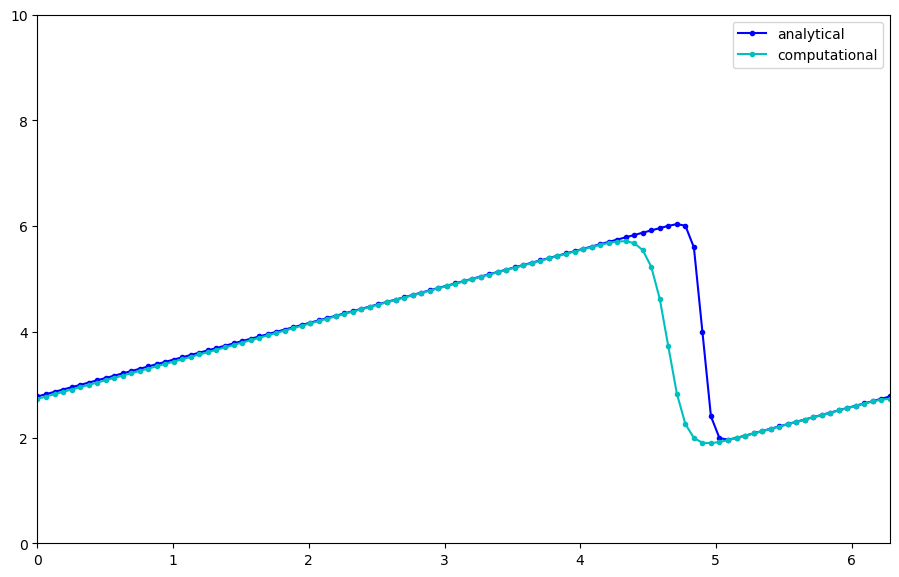

In [15]:
pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(xdimension, u_analytical, marker='.', color='b', label='analytical')
pyplot.plot(xdimension, u, marker='.', color='c', label='computational')
pyplot.legend()
pyplot.xlim([0,2*np.pi])
pyplot.ylim([0,10]);